<h1><center>Laboratorio 9: Los huesos de Hipócrates 🦴</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Matías Rojas y Mauricio Araneda
- Auxiliar: Ignacio Meza D.
- Ayudante: Rodrigo Guerra

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Werner González H
- Nombre de alumno 2: Maximiliano Rosadio Z


### **Link de repositorio de GitHub:** `https://github.com/wernergh9/MDS7202.git`

### Indice 

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Creación de clasificadores de imagenes a traves de redes Fully connected y CNN.
- Uso de Dataloaders para la carga de datasets.
- Comparación de Fully Connected y red convolucional.

## Reglas:

- Fecha de entrega: 17/11/2022
- **Grupos de 2 personas**
- **Ausentes** deberán realizar la actividad solos. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquier material del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Creación de modelos de clasificación de imágenes utilizando Pytorch.
- Creación de dataloader y aplicar transformaciones sobre el dataset.
- Comprender la diferencia entre una CNN y una Fully Connected.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones de `Pytorch`, la cual, está enfocada para proyectos de Deep Learning.


# Importamos librerias utiles 😸

Comenzamos importando librerías utiles para la ejecución del laboratorio:

In [ ]:
import os
import time
from PIL import Image

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px

import torch
import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader

import torchvision
from torchvision import datasets, models
from torchvision import transforms as T

# Identificando los Huesos de Hipócrates🔎

<p align="center">
  <img src="https://i.pinimg.com/originals/d8/58/66/d85866cd1cc3979f94526551addf74b4.gif" width="300">
</p>

Tras el éxito que han tenido proponiendo modelos de machine learning en trabajos anteriores, el famoso medico Hipócrates se ha contactado con ustedes para solicitarles ayuda para automatizar la identificación de radiografías de partes humanas. Para esto, les señala que le gustaría utilizar algoritmos de deep learning producto que Demócrito le señalo que resultan la mejor alternativa para la predicción de imágenes.

En su conversación con el medico usted le comenta que ha tenido algunas clases relacionadas a Deep Learning, por esto, están motivados en abordar el problema utilizando redes Fully Connected y redes convolucionales con Pytorch. Sin embargo, al anunciarle los tipos de redes que conocen, el filósofo les comenta que no había escuchado muy buenos resultados por parte de las CNN, por lo que les pide que comprueben a traves de la métrica de accuracy que tipo de redes es mejor para la tarea de identificación de radiografías. ¿Será cierto lo que dice el filósofo?, Veámoslo en un nuevo capítulo de los Laboratorios de Programación Científica para Ciencia de Datos!

## 1.1 Creación de Lista de Archivos

<p align="center">
  <img src="https://media.tenor.com/BJ-9w-MUVCMAAAAM/tis100-sad.gif" width="300">
</p>


Comience revisando de forma manual cada una de las imágenes que posee la carpeta subida a material docente. Verifique la cantidad de tipos de radiografías que se tienen y la cantidad de imágenes que dispone cada carpeta.

Revisado el contenido de las imágenes, utilice `os.listdir` para crear un `numpy.array` o un `Dataframe` que contenga las imágenes y un label que señale al tipo de radiografía a la que hace referencia la imagen. Para hacer las etiquetas codifique el tipo de imágenes en números que vayan del 0 al total de tipos de radiografías, no utilice strings para codificar las etiquetas.

**Ejemplo de Estructura:**

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0lax"></th>
    <th class="tg-0lax">image_path</th>
    <th class="tg-0lax">label</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0lax">0</td>
    <td class="tg-0lax">image1</td>
    <td class="tg-0lax">1</td>
  </tr>
  <tr>
    <td class="tg-0lax">1</td>
    <td class="tg-0lax">image2</td>
    <td class="tg-0lax">0</td>
  </tr>
  <tr>
    <td class="tg-0lax">2</td>
    <td class="tg-0lax">image3</td>
    <td class="tg-0lax">2</td>
  </tr>
  <tr>
    <td class="tg-0lax">3</td>
    <td class="tg-0lax">image4</td>
    <td class="tg-0lax">0</td>
  </tr>
  <tr>
    <td class="tg-0lax">4</td>
    <td class="tg-0lax">image5</td>
    <td class="tg-0lax">4</td>
  </tr>
</tbody>
</table>

In [ ]:
# el archivo comprimido se descarga en la carpeta /tmp y el nombre del archivo es archive.zip
!wget --no-check-certificate \
    "https://www.dropbox.com/s/co6ee2vg5ybzyn6/Medical-MNIST.zip?dl=1" \
    -O /tmp/archive.zip

--2022-11-14 15:09:21--  https://www.dropbox.com/s/co6ee2vg5ybzyn6/Medical-MNIST.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6030:18::a27d:5012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/co6ee2vg5ybzyn6/Medical-MNIST.zip [following]
--2022-11-14 15:09:22--  https://www.dropbox.com/s/dl/co6ee2vg5ybzyn6/Medical-MNIST.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc781aa97714faeda1dfe5fe7eb9.dl.dropboxusercontent.com/cd/0/get/Bwup5_3_Sutn7EFDpU0oEI4fvg5IhNWj3_4WlMbJQpvByKjfUYkObTlBgbaYFb4Z6ArN0tYYiDqQODAz4tK6Ru2fNcrkuE2qZMh8kt9njCRWBZzz4g8jYy5NQDWIJT-pOdiqRNHZHD1yT7MGU1I0n7qeMkXh9M-5k4zBp1H8zFhuBfWoFpKbmzMYJlj-VRv3-ow/file?dl=1# [following]
--2022-11-14 15:09:23--  https://uc781aa97714faeda1dfe5fe7eb9.dl.dropboxusercontent.com/cd/0/get/Bwup5_3_Sutn7EFDpU0oEI4fvg5IhNWj3_4WlMb

In [ ]:
import zipfile

# el contenido se descomprime en la carpeta /tmp que es una carpeta temporal del sistema. se puede cambiar para descomprimirlo donde se quiera
local_zip = '/tmp/archive.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
import os
base_dir = '/tmp/Medical-MNIST'
print(os.listdir(base_dir))

['CXR', 'HeadCT', 'AbdomenCT', 'Hand', 'ChestCT', 'BreastMRI']


In [ ]:
# Código Aquí
array = []
for i, category in enumerate(os.listdir(base_dir)):
    for image in os.listdir(base_dir+"/"+category):
      image_path = base_dir+"/"+category+"/"+image
      label = i
      array.append([image_path, label])

In [ ]:
df = pd.DataFrame(array, columns=["image_path", "label"])
df

,image_path,label
0,/tmp/Medical-MNIST/CXR/009554.jpeg,0
1,/tmp/Medical-MNIST/CXR/001781.jpeg,0
2,/tmp/Medical-MNIST/CXR/007672.jpeg,0
3,/tmp/Medical-MNIST/CXR/001733.jpeg,0
4,/tmp/Medical-MNIST/CXR/000377.jpeg,0
...,...,...
58949,/tmp/Medical-MNIST/BreastMRI/001316.jpeg,5
58950,/tmp/Medical-MNIST/BreastMRI/004407.jpeg,5
58951,/tmp/Medical-MNIST/BreastMRI/007075.jpeg,5
58952,/tmp/Medical-MNIST/BreastMRI/004931.jpeg,5


## 1.2 Creación de Dataset

Tomando en cuenta la estructura de datos desarrollada en el punto 1.1, construya la clase `MedicalDataset()` que cumpla los siguientes puntos:

- [ ] Poseer un `__init__` en el que se almacene `estructura` creada en 1.1, la `raiz` de la carpeta y una función que permita transformar el dataset (de esto no se preocupe mucho, ya que solamente debe almacenar una función en el atributo).
- [ ] La clase debe ser capaz de entregar la cantidad de elementos a traves de `__len__`.
- [ ] Debe poseer el método `__getitem__` que retorne una tupla con la imagen y su correspondiente etiqueta.

In [ ]:
# Código Aquí
class MedicalDataset(Dataset):
    def __init__(self, estructura, base_dir, transform = None):
        self.estructura = estructura
        self.raiz = base_dir
        self.transform = transform
    
    def __getitem__(self, index):
        img_path, label = self.estructura.iloc[index]
        # Un poco de ayuda para cargar la imagen
        image = Image.open(img_path).convert('RGB')
        
        # Auida para realizar la transformación
        if self.transform:
            image = self.transform(image)
        
        return image, label
    
    def __len__(self):
        return len(self.estructura)

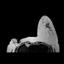

In [ ]:
med_dataset = MedicalDataset(df, base_dir)
image, label = med_dataset[50000]
display(image)

## 1.3 Prueba del MedicalDataset

Con la clase construida en el punto 1.2, verifique su funcionamiento cargando el dataset y realizando las transformaciones que entrega la función `transform_image`. Compruebe a través de un ejemplo las transformaciones aplicadas en la imagen, comentando la función que cumple `MedicalDataset` y si es posible observar todas las transformaciones aplicadas con la función `transform_image`.

- [ ] Probar la clase MedicalDataset y aplicando una transformación de "train"
- [ ] Plotear un ejemplo del MedicalDataset.

**Función para transformar las imagenes:**

In [ ]:
def transform_image(stage = None):
    
    if stage == "train":
        Tr_img = T.Compose([T.Resize(size = (256,256)),
                T.RandomRotation(degrees = (-20,+20)),
                T.ToTensor()])
        
    elif stage == "test" or stage == "val":
        #Tr_img = T.Compose([T.Resize(size = (224,224)), T.ToTensor()]) 
        Tr_img = T.Compose([T.Resize(size = (256,256)), T.ToTensor()])

    return Tr_img

**Código para obtener un ejemplo:**

In [ ]:
# Prueba del dataset
dataset = MedicalDataset(df, base_dir, transform_image("train"))


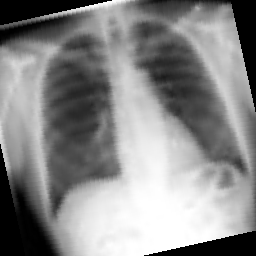

In [ ]:
data_test= iter(dataset)
example_image = next(data_test)
example_image_2 = np.moveaxis(example_image[0].numpy(), 0, -1)
# Utilice plotly para plotear un ejemplo
px.imshow(example_image_2)

> Comente que realiza la clase construida y las transformaciones aplicadas.

El dataset de imágenes es muy pesado hablando de memoria, entonces subir todas las imágenes a la memoria RAM no es buena idea porque ocuparía demasiado espacio. Para arreglar este problema se crea la clase MedicalDataset que es una clase hereda la clase Dataset de pytorch. Este MedicalDataset tiene la función de almacenar las rutas de las imágenes en el disco y su respectiva clase. De esta manera, al pedir una imagen en particular, el método `__getitem__` usa la ruta de la imagen para buscarla en el disco, subir esa imagen en particular a la memoria RAM y devolver la imagen como arreglo. De esta manera la imagen solo usa memoria RAM al momento de pedirla con `__getitem__`.

En particular se muestra un ejemplo donde se recupera la imagen X del dataset. Se puede observar la primera transformación que consiste en reescalar la imagen a un tamaño de 256x256 (ya que antes se pudo ver que las imagenes son más pequeñas) y se puede observar una rotación con los bordes que quedan sobrantes por esta rotación rellenado con ceros que visualmente corresponde a secciones negras.

La desventaja de este método, es que es muy lento. Toma mucho tiempo acceder al disco y cargar la imagen a la memoria RAM. Al tener una cantidad grande de imágenes el entrenamiento de una red neuronal se hace muy lenta por este problema. Existen eso si forma más sofisticadas para acelerar este proceso.

## 1.4 Creación de Clasificadores

<p align="center">
  <img src="https://149695847.v2.pressablecdn.com/wp-content/uploads/2018/01/conv-full-layer.gif" width="300">
</p>

A continuación, deben construir tres clasificadores con los que deberán verificar cuál de las arquitecturas posee un mejor desempeño para la tarea de clasificación de imágenes. Para la construcción considere los siguientes puntos:

- [ ] Señale cual es el objetivo del `forward` en este tipo de redes, sea breve para su explicación.
- [ ] Construir una red Fully Connected para solucionar el problema de clasificación. Para esta parte se le aconseja que rellene el esqueleto dispuesto más abajo y que lleva el nombre de `FCClassifier`, en el deberá rellenar con la dimensión de las capas ocultas y verificar cual será el tamaño de la entrada.
- [ ] Construya una red convolucional **simple** (no más de una capa convolucional) para la tarea de clasificación de imágenes, para esto basen su código en la clase del día `09-11-2022`.
- [ ] Crear una red convolucional más compleja. Para esta parte tienen completa libertad en la construcción de su red, lo único que debe cumplir es que sea convolucional.

**Esqueletos Propuestos:**

In [ ]:
class FCClassifier(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(FCClassifier, self).__init__()
        self.flatten = nn.Flatten()
        self.lin1 = nn.Linear(in_channels, 1000)
        self.relu_1 = nn.ReLU()
        self.lin2 = nn.Linear(1000, num_classes)
        
    def forward(self, x):
        out = self.flatten(x)
        out = self.lin1(out)
        out = self.relu_1(out)
        out = self.lin2(out)

        return out

In [ ]:
class CNNClassifier1(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(CNNClassifier1, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, 6, 7, padding=3)
        self.pool = nn.MaxPool2d(4,4)
        self.relu_cnn = nn.ReLU()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(6*64*64, 120)
        self.relu_1 = nn.ReLU()
        self.fc2 = nn.Linear(120, 84)
        self.relu_2 = nn.ReLU()
        self.fc3 = nn.Linear(84, num_classes)
        
    def forward(self, x):
        out = self.conv1(x)
        out = self.pool(out)
        out = self.relu_cnn(out)
        out = self.flatten(out)
        out = self.fc1(out)
        out = self.relu_1(out)
        out = self.fc2(out)
        out = self.relu_2(out)
        out = self.fc3(out)

        return out
    
class CNNClassifier2(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(CNNClassifier2, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, 6, 7, padding=3)
        self.pool = nn.MaxPool2d(3,3)
        self.relu_cnn1 = nn.ReLU()
        self.conv2 = nn.Conv2d(6,16,5, padding=2)
        self.relu_cnn2 = nn.ReLU()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(16*28*28, 1000)
        self.relu_1 = nn.ReLU()
        self.fc2 = nn.Linear(1000, 120)
        self.relu_2 = nn.ReLU()
        self.fc3 = nn.Linear(120, 84)
        self.relu_3 = nn.ReLU()
        self.fc4 = nn.Linear(84, num_classes)
        
    def forward(self, x):
        out = self.conv1(x)
        out = self.pool(out)
        out = self.relu_cnn1(out)
        out = self.conv2(out)
        out = self.pool(out)
        out = self.relu_cnn2(out)
        out = self.flatten(out)
        out = self.fc1(out)
        out = self.relu_1(out)
        out = self.fc2(out)
        out = self.relu_2(out)
        out = self.fc3(out)
        out = self.relu_3(out)
        out = self.fc4(out)

        return out

El objetivo del forward es hacer una "pasada hacia adelante" de la red. Esto significa que se le entrega un tensor de entrada, en este caso una imagen, hace todo el procesamiento de la red de pasar por capas lineales y/o convolucionales y funciones de activación, para poder entregar una predicción. Es importante destacar que este pasada es con los parámetros de la red ya fijos, no existe ajuste de parámetros en este método. 

Hay que mencionar que en realidad por temas de implementación el método forward no entrega la predicción, sino entrega un vector que se llama logits, que representa valores de probabilidad de las clases en un rango de $-\infty$ a $\infty$. El logits se pasa por una función softmax para dejar los valores entre 0 y 1 y que sean efectivamente probabilidades.

## 1.5 Separando Datos para el Entrenamiento

<p align="center">
  <img src="https://c.tenor.com/Esn7Jif-ZLQAAAAC/separate-square.gif" width="200">
</p>

Utilizando un Holdout a su gusto, separe los datos en un conjunto de entrenamiento y de testing. Aplique las transformaciones correspondientes usando `transform_image` para cada conjunto de datos y utilice `torch.utils.data.DataLoader` para crear un objeto iterable del dataset.

- [ ] Definir el Holdout a utilizar.
- [ ] Separar los datos en un conjunto de entrenamiento y prueba.
- [ ] Aplicar las transformaciones correspondientes en cada uno de los dataset.
- [ ] Utilizar `DataLoader` de pytorch sobre los dataset.

In [ ]:
# Separar Datos de Entrenamiento
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(df, test_size=0.3)

In [ ]:
# Uso de torch.utils.data.DataLoader
batch_size = 128
train_loader = DataLoader(MedicalDataset(data_train, base_dir, transform_image("train")), batch_size=batch_size, shuffle=True)
test_loader = DataLoader(MedicalDataset(data_test, base_dir, transform_image("test")), batch_size=batch_size, shuffle=True)

## 1.6 Creación de Funciones de Entrenamiento y Evaluación

<p align="center">
  <img src="https://www.researchgate.net/publication/319535615/figure/fig3/AS:536187598065664@1504848493070/A-typical-convolutional-neural-network-CNN-Architecture-for-Medical-Image-Classification.png" width="500">
</p>


Ya construido todas las funciones y clases necesarias llego el momento más importante... probar la red. Para esta sección, ustedes deberán ser capaces de definir los hiperparámetros de la red, definir las funciones de perdida a utilizar, señalar el optimizador a usar y finalmente crear sus funciones para el entrenamiento y prueba. Para realizar esta parte más estructurada, seguir los siguientes puntos de forma secuencial:

- [ ] Especifique los Hiperparámetros de las 3 redes. Para esta parte sea claro de su elección y señale el porqué de sus elecciones (o sea justifique el setting de sus hiperparámetros).
- [ ] Defina los modelos a utilizar, el optimizador que utilizará para el modelo y señale la función de perdida que utilizará.
- [ ] Explique de forma breve la función que cumplen los pasos `Backward` y `Descenso del gradiente` en una red neuronal.
- [ ] Cree una función llamado `train` que entrene a los clasificadores. Para esto, recuerde que estos modelos suelen utilizar un número de épocas, por lo que deberá generar un proceso iterativo de entrenamiento. Es importante que su función imprima las `loss` obtenidas por el modelo en cada época (si gusta puede almacenar estas losses en una lista para luego graficarlas y comparar).
- [ ] Diseñe una función para evaluar el desempeño de las redes. Para evaluar las redes utilice solamente la métrica accuracy (para esto se le recomienda comparar la predicción con el ground truth)

Las tres redes serán entrenadas usando el optimizador Adam con un learning rate de 0.001 y los parámetros de $\beta'$s por defecto (0.9, 0.999). Esta elección se basa en que empíricamente se ha demostrado que este optimizador converge más rápido a un óptimo. Por su parte, la combinación de parámetros ($lr$, $\beta'$s) que escogimos es una de las más clásicas para este optimizador y fue considerada como un punto de partida, lo cual significa que estos parámetros se podrían cambiar si no se llega a resultados satisfactorios. 

Las 3 redes usarán ademas la entropía cruzada como función de pérdida, esto debido a que es una $Loss$ común en problemas de clasificación multiclase como es el caso. Cabe destacar que dicha $Loss$ ya viene incorporada con la función de activación $Softmax$ en pytorch por lo que no es necesario incluirla dentro de la configuración de la red. 

In [ ]:
# Especificar hyperparámetros de las redes
in_channels_fc = 256*256*3
in_channels_cnn = 3
num_classes = 6
lr = 0.001
n_epochs = 5

In [ ]:
# train
def train(model, train_loader, num_epochs, lr, report_every=1):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model.to(device)
    Train_loss = []
    Train_accuracy = []

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    model.train()
    
    for e in range(num_epochs):
      train_loss = 0
      correct = 0
      num_data = 0

      for i, (data, label) in enumerate(train_loader):

        images, labels = data.to(device), label.to(device)           
        
        optimizer.zero_grad()

        #Forward
        output = model(images)
        # Descenso del gradiente
        
        loss = criterion(output,labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        correct += torch.sum(output.argmax(1) == labels)
        num_data += len(data)

      # Saving training loss  
      Train_loss.append(train_loss/len(train_loader))

      # Accuracy
      accuracy = 100*correct/num_data
      Train_accuracy.append(accuracy.cpu())

      if (e+1) % report_every == 0 or e == 0:
            print(f'Epoch {e+1} \t\t Training Loss: {train_loss/len(train_loader)} \t\t  Training Accuracy: {accuracy}')

    return Train_loss, Train_accuracy
        

# Evaluate
def evaluate(loader, model):
    
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model.to(device)

    criterion = nn.CrossEntropyLoss()

    total_loss = 0
    correct = 0
    num_data = 0

    model.eval()
    with torch.no_grad():

      for i, (data, label) in enumerate(loader):

        images, labels = data.to(device), label.to(device)            
        
        #Forward
        output = model.forward(images)

        loss = criterion(output,labels)

        total_loss += loss.item()
        correct += torch.sum(output.argmax(1) == labels)
        num_data += len(data)

      # Saving training loss  
      total_loss = total_loss/len(loader)

      # Accuracy
      accuracy = (100*correct/(num_data)).cpu()

    return total_loss, accuracy
        

Una vez hecha la pasada hacía adelante por la red (forward) se obtiene una salida, la cual es pasada por una función de activación $Softmax$ para obtener las probabilidades de pertenencia de cada entradada a cada clase, luego, estas probabilidades son comparadas con las clases reales mediante la función de pérdida para obtener una especie de error de estimación. Lo que hace el método $Backward$ es calcular el gradiente de la función de pérdida con respecto a los pesos de la red y evaluarlo en los datos de entrada (en este caso lo hace por bache), de esta manera se puede llamar al método $step$, el cual actualiza los pesos en función del learning rate y de los gradientes calculados anteriormente. 

## 1.7 Comparación de Resultados

<p align="center">
  <img src="https://media2.giphy.com/media/icJA0VF7ntoEL18Jez/giphy.gif"  width="200">
</p>

Construidas las funciones de entrenamiento y evaluación, entrene a las redes que construyo y compare los resultados obtenidos con todas las redes señalando cual posee mejor rendimiento. Comente una diferencia entre las redes Fully Connected y CNN podría generar un mejor desempeño en una u otra en la tarea de clasificación de imágenes.

- [ ] Entrenar las redes.
- [ ] Evaluar las redes.
- [ ] Comentar los resultados obtenidos y visualizar si existe una diferencia significativa en el rendimiento debido a la naturaleza de la red.

In [ ]:
# Red 1
model_fc = FCClassifier(in_channels_fc, num_classes)

Train_loss, Train_accuracy = train(model_fc, train_loader, n_epochs, lr)

Epoch 1 		 Training Loss: 4.283179990843446 		  Training Accuracy: 89.77391052246094
Epoch 2 		 Training Loss: 0.2951182754345933 		  Training Accuracy: 95.58969116210938
Epoch 3 		 Training Loss: 0.08749066022889337 		  Training Accuracy: 97.7391128540039
Epoch 4 		 Training Loss: 0.06445451623229627 		  Training Accuracy: 98.11228942871094
Epoch 5 		 Training Loss: 0.07006328832610415 		  Training Accuracy: 98.02989959716797


In [ ]:
loss1, accuracy1 = evaluate(test_loader, model_fc)

print("Loss y accuracy de test:\n")
print(f"Loss: {loss1}   -  Accuracy: {accuracy1}")

Loss y accuracy de test:

Loss: 0.03634834616099947   -  Accuracy: 99.0501480102539


In [ ]:
# Red 2
model_cnn1 = CNNClassifier1(in_channels_cnn, num_classes)

Train_loss, Train_accuracy = train(model_cnn1, train_loader, n_epochs, lr)

Epoch 1 		 Training Loss: 0.15744519193913362 		  Training Accuracy: 94.86029815673828
Epoch 2 		 Training Loss: 0.042131524291552674 		  Training Accuracy: 98.62117004394531
Epoch 3 		 Training Loss: 0.01919506007034891 		  Training Accuracy: 99.47415161132812
Epoch 4 		 Training Loss: 0.011733369246624763 		  Training Accuracy: 99.64378356933594
Epoch 5 		 Training Loss: 0.035639663017499074 		  Training Accuracy: 98.90953826904297


In [ ]:
loss2, accuracy2 = evaluate(test_loader, model_cnn1)

print("Loss y accuracy de test:\n")
print(f"Loss: {loss2}   -  Accuracy: {accuracy2}")

Loss y accuracy de test:

Loss: 0.016439647049468896   -  Accuracy: 99.53073120117188


In [ ]:
# Red 3
model_cnn2 = CNNClassifier2(in_channels_cnn, num_classes)

Train_loss, Train_accuracy = train(model_cnn2, train_loader, n_epochs, lr)

Epoch 1 		 Training Loss: 0.14964663650157167 		  Training Accuracy: 95.20197296142578
Epoch 2 		 Training Loss: 0.01717555605184327 		  Training Accuracy: 99.44992065429688
Epoch 3 		 Training Loss: 0.008683479737851555 		  Training Accuracy: 99.75767517089844
Epoch 4 		 Training Loss: 0.005989228873355055 		  Training Accuracy: 99.8037109375
Epoch 5 		 Training Loss: 0.009244053886504844 		  Training Accuracy: 99.68254852294922


In [ ]:
loss3, accuracy3 = evaluate(test_loader, model_cnn2)

print("Loss y accuracy de test:\n")
print(f"Loss: {loss3}   -  Accuracy: {accuracy3}")

Loss y accuracy de test:

Loss: 0.030603658991782898   -  Accuracy: 99.2819595336914


Se entrenaron las 3 redes por un total de 5 épocas. En cuanto al desempeño de las redes durante el entrenamiento, las 3 llegaron a resultados muy similares y satisfactorios. La red feed forward fue la que obtuvo menores resultados, tanto en acurracy como loss, pero es en este último donde se puede ver mayor diferencia con las CNN. Con respecto a estas, la segunda CNN (más compleja)  muestra alcanzar un mejor accuracy durante el entrenamiento pero peor en la validación en comparación a la más simple, esto se puede deber al mayor potencial de la segunda para sobreajustarse. Sin más que decir, se puede concluir que ambos tipos de redes funcionaron bien para estos datos, aunque las CNN muestran una pequeña superioridad con respecto a la red feed forward. Se espera que dicha diferencia pueda ser más aún cuando se trabaje con datos más complejos y de mayor dimensionalidad. 

# Conclusión

Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

<p align="center">
  <img src="https://media.tenor.com/vKSR-ZakVMIAAAAC/pochitadancing-pochita.gif">
</p>